# Preço de imoveis

**Objetivo**: estimar os preços de imóveis
 * Identificar aspectos que contribuem para precificação dos imoveis
 * Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
 * Precificar um imóvel novo.

Base de dados [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



# Ajustando uma reta

## Conhecendo os dados

In [1]:
import pandas as pd

In [2]:
#Lendo dados
dados = pd.read_csv("./Data/Preços_de_casas.csv")
dados

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.00
1,2,117.2398,0,0.0000,2,460,0,894795.00
2,3,85.4680,1,80.4514,2,608,0,1101855.00
3,4,89.2769,1,70.2324,1,642,0,690200.00
4,5,106.3705,1,97.8237,2,836,0,1232500.00
...,...,...,...,...,...,...,...,...
1433,1456,88.5337,1,64.4726,2,460,0,862750.00
1434,1457,192.5817,0,0.0000,2,500,0,1035300.00
1435,1458,110.3652,1,107.0208,2,252,0,1313845.00
1436,1459,100.1462,0,0.0000,1,240,0,700676.25


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [4]:
dados = dados.drop(columns = "Id")

## Correlação

Com o coeficiente de Correlação de Pearson nos permite medir a relação linear entre variáveis, oferecendo uma escala que varia de -1 a 1, que interpretamos conforme sua intensidade e direção:

* -1: correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta.
* 0: não há relação linear entre as variáveis.
* 1: indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra também diminui.



In [5]:
# Correlação
corr = dados.corr()

In [6]:
corr['preco_de_venda']

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

## Relacionando variáveis

In [7]:
# importando as visualizações
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
# Qual a reta que melhor se adequa a relação?
px.scatter(dados, x = 'area_primeiro_andar', y = 'preco_de_venda', trendline_color_override="red", trendline = 'ols' )

# Explicando a reta
Ajustamos uma reta entre o $m^2$ do primeiro andar e o preço da casa. Queremos explicar o preço da casa a partir do seu tamanho, por isso dizemos que:

* Variável explicativa/independente: Área do primeiro andar

* Variável resposta/dependente: Preço da casa

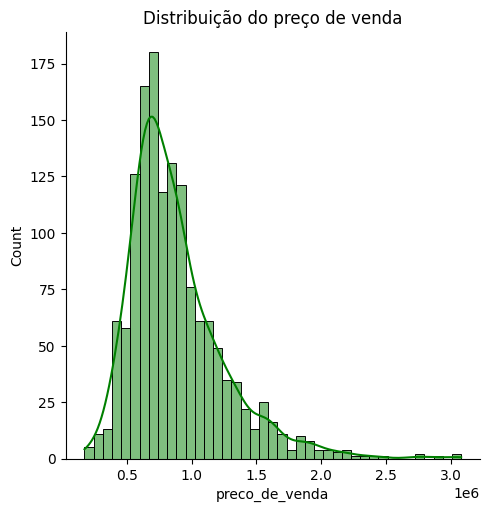

In [9]:
sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

### Separando em treino e teste

O conjunto de **treinamento** é usado para ajustar o modelo, enquanto o conjunto de **teste** é usado para avaliar seu desempenho em prever preços de casas não vistos durante o treinamento, que auxilia na generalização do modelo.

In [14]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [15]:
# Definindo y e X
y = dados['preco_de_venda']
X = dados.drop(columns = 'preco_de_venda')

In [16]:
#Aplicando o split do y e X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 230)

In [17]:
#Dados de treino para usar a fórmula

df_train = pd.DataFrame(data= X_train )
df_train['preco_de_venda'] = y_train

In [18]:
# import ols
from statsmodels.formula.api import ols

In [19]:
# ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data = df_train ).fit()

## Analisando os coeficientes


In [20]:
modelo_0.params

Intercept              152909.288334
area_primeiro_andar      6793.641641
dtype: float64

In [22]:
print(modelo_0.summary())


                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          2.22e-105
Time:                        13:57:46   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

In [23]:
# observando o R²
modelo_0.rsquared

np.float64(0.37728010994297867)

## Entendendo o resíduo

In [24]:
modelo_0.resid

1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

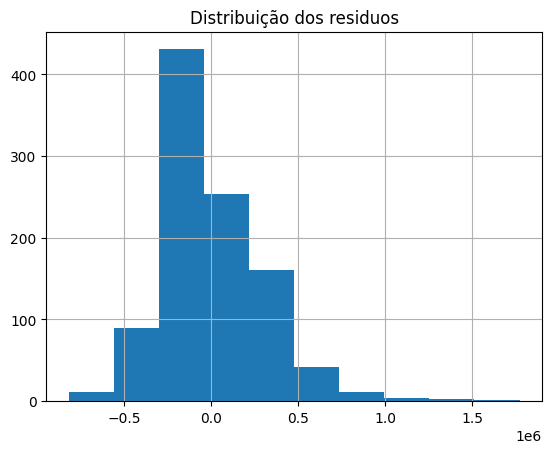

In [25]:
modelo_0.resid.hist()
plt.title("Distribuição dos residuos")
plt.show()




## Obtendo o R² da previsão

In [26]:
# definindo o Y previsto
y_predict = modelo_0.predict(X_test)

In [27]:
# importando o r2_score
from sklearn.metrics import r2_score

In [28]:
print("R²: ", r2_score(y_test,y_predict ))

R²:  0.38530928723202407


# Adicionando outras características



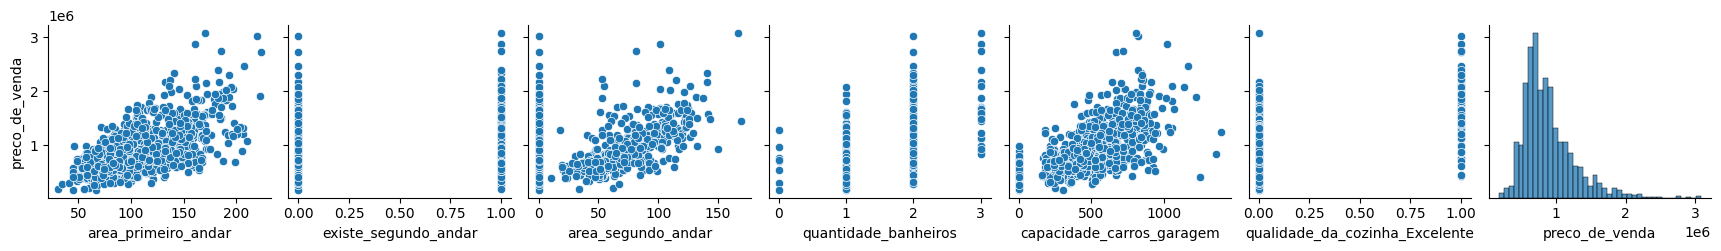

In [33]:
sns.pairplot(dados, y_vars = 'preco_de_venda')


## Adicionando fatores no modelo

In [34]:
import statsmodels.api as sm

In [35]:
X_train = sm.add_constant(X_train)


In [36]:
X_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [37]:
X_train.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [38]:
modelo_1 = sm.OLS(y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'area_segundo_andar','quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [39]:
modelo_2 = sm.OLS(y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [40]:
modelo_3 = sm.OLS(y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [41]:
# Resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          2.79e-289
Time:                        14:01:47   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [42]:
# Resumo do modelo 2
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          1.93e-264
Time:                        14:01:47   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [43]:
# Resumo do modelo 3
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          4.15e-227
Time:                        14:01:48   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Comparando modelos


In [44]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)

R²
Modelo 0:  0.37728010994297867
Modelo 1:  0.7414024156090393
Modelo 2:  0.7081440416220739
Modelo 3:  0.6511289354898803


In [45]:
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
7
6
5


# Precificando as casas

## Obtendo o R² da previsão

In [48]:
# Adicionando uma constante em X_test
X_test = sm.add_constant(X_test)

In [49]:
# Prevendo com o modelo 3
predict_3 = modelo_3.predict(X_test[['const','area_primeiro_andar','existe_segundo_andar', 'quantidade_banheiros',
                         'qualidade_da_cozinha_Excelente' ]])

In [50]:
# Qual o r² da previsão?
modelo_3.rsquared

np.float64(0.6511289354898803)

In [51]:
# Qual o R² do treino?
print("R²: ", r2_score(y_test, predict_3))

R²:  0.6432078074497707


In [53]:
#Novo imovel
novo_imovel = pd.DataFrame({ 'const': [1],
                             'area_primeiro_andar': [120],
                              'existe_segundo_andar': [1],
                              'quantidade_banheiros': [2],
                              'qualidade_da_cozinha_Excelente':[0]
})

In [54]:
# Qual o preço desse imóvel com o modelo 0?
modelo_0.predict(novo_imovel['area_primeiro_andar'])

0    968146.285305
dtype: float64

In [55]:
# Qual o preço desse imóvel com o modelo 3?
print(modelo_3.predict(novo_imovel)[0])

1123758.2426020512


In [58]:
novas_casas = pd.read_csv("./Data/Novas_casas.csv", sep = ";")
novas_casas.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [59]:
novas_casas = novas_casas.drop(columns = "Casa" )

In [60]:
# Adicionando uma constante
novas_casas = sm.add_constant(novas_casas)

In [61]:
# Qual o preço dessas novas casas?
modelo_3.predict(novas_casas)

0    1.751739e+06
1    1.863058e+06
2    1.568149e+06
3    2.206758e+06
4    1.591629e+06
5    1.246151e+06
6    1.357470e+06
7    1.552134e+06
8    9.636478e+05
9    1.639974e+06
dtype: float64

# Investigando o modelo





## Multicolinearidade


Quando duas ou mais coisas que você está tentando estudar são tão parecidas que é difícil dizer o quanto cada uma delas está influenciando o resultado.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [68]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variavel'] = explicativas_1

vif_1["vif"] = [ variance_inflation_factor(X_train[explicativas_1], i ) for i in range(len(explicativas_1))]

vif_1

,variavel,vif
0,const,20.230833
1,area_primeiro_andar,2.193680
2,existe_segundo_andar,7.455059
3,area_segundo_andar,7.589396
4,quantidade_banheiros,1.720795
5,capacidade_carros_garagem,1.570078
6,qualidade_da_cozinha_Excelente,1.182606


In [69]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3['variavel'] = explicativas_3

vif_3["vif"] = [ variance_inflation_factor(X_train[explicativas_3], i ) for i in range(len(explicativas_3))]

vif_3

,variavel,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795


## Análise dos resíduos

Resíduos: a discrepância entre os valores reais e os valores que o modelo prevê para os mesmos pontos de dados.

In [70]:
# Prevendo os valores do treino X_train[explicativas_3]
y_previsto_train = modelo_3.predict(X_train[explicativas_3])


In [71]:
# Fazendo um scatter plot entre y_previsto e y_train

fig = px.scatter(x= y_previsto_train    , y= y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [72]:
# Residuos
residuos = modelo_3.resid

Text(0, 0.5, 'Resíduos')

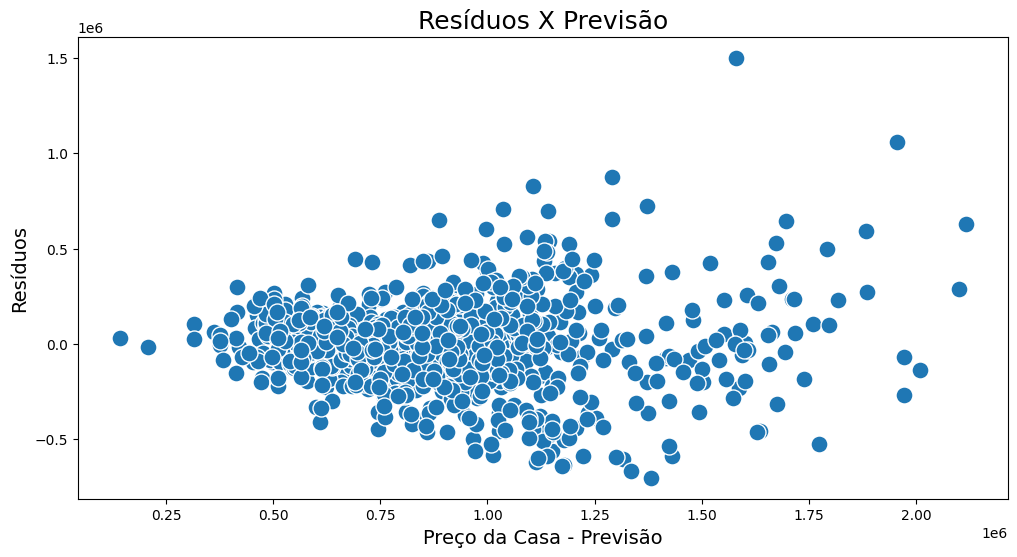

In [76]:
ax = sns.scatterplot(x= y_previsto_train   , y=residuos, s=150)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
